# Resumo
 
Neste trabalho, apresentamos uma análise detalhada das equações difusivas de Streeter-Phelps, focando especificamente no decaimento não-linear da Demanda Bioquímica de Oxigênio (BOD) através de cinéticas do tipo Monod. O estudo investiga matematicamente a existência e estabilidade de soluções de *Travelling Waves* (ondas viajantes) neste sistema. Estas soluções são de particular interesse pois descrevem a dinâmica espaço-temporal dos processos de purificação e contaminação em rios, permitindo uma melhor compreensão dos mecanismos de autodepuração dos corpos d'água. A análise inclui simulações numéricas que demonstram o comportamento dessas ondas sob diferentes condições paramétricas.

# Introdução e Objetivos
 
 A qualidade da água em ambientes fluviais é um tema de grande relevância ambiental, sendo frequentemente avaliada por meio de modelos matemáticos que consideram dois parâmetros principais: a demanda bioquímica de oxigênio (BOD) e o oxigênio dissolvido (DO). A BOD indica a quantidade de oxigênio necessária para degradar a matéria orgânica presente na água, enquanto o DO representa a concentração de oxigênio disponível para os organismos aquáticos.

 Neste trabalho, investigamos a existência e estabilidade de soluções de ondas viajantes nas equações difusivas de Streeter-Phelps, com uma modificação importante: a incorporação de um decaimento não-linear da BOD através de cinéticas do tipo Monod. Esta abordagem permite uma representação mais realista dos processos bioquímicos envolvidos na autodepuração dos rios.

 As soluções de ondas viajantes são particularmente interessantes pois podem descrever tanto fenômenos de purificação quanto de contaminação do rio, dependendo dos parâmetros do modelo. Através de análises matemáticas rigorosas e simulações numéricas, buscamos compreender como estes diferentes regimes emergem e se estabilizam ao longo do curso d'água.

# Modelo
 
 O modelo de Streeter-Phelps descreve a dinâmica espacial e temporal da Demanda Bioquímica de Oxigênio (BOD) e do Oxigênio Dissolvido (DO) em rios. Neste trabalho, consideramos uma versão modificada que inclui termos difusivos e cinética não-linear do tipo Monod para o decaimento da BOD.

 O sistema de equações diferenciais parciais que governa este modelo é:

 `∂b/∂t + v∂b/∂x = K∂²b/∂x² - k₃b + bₐ`

 `∂D/∂t + v∂D/∂x = K∂²D/∂x² - k₁b + k₂(Ds - D)`

 onde:
 - b(x,t) é a concentração de BOD
 - D(x,t) é a concentração de DO
 - v é a velocidade do rio
 - K é o coeficiente de difusão
 - k₃ é a taxa de decomposição da BOD
 - k₁ é a taxa de consumo de oxigênio pela BOD
 - k₂ é a taxa de reaeração
 - bₐ é a entrada de poluição
 - Ds é o nível de saturação do oxigênio dissolvido

 Para encontrar soluções de ondas viajantes, fazemos a transformação ξ = x - ct, onde c é a velocidade da onda.

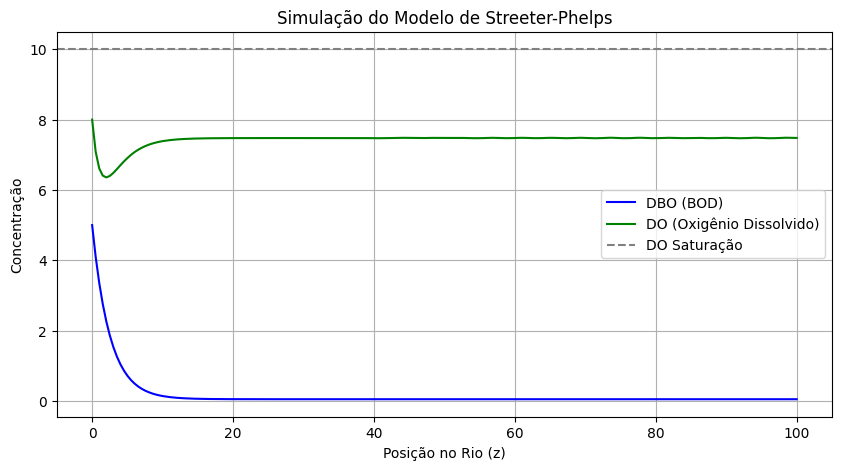

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parâmetros do modelo
v = 1.0      # Velocidade do rio (m/s)
K = 0.1      # Coeficiente de difusão
k1 = 0.2     # Taxa de consumo de oxigênio pela DBO
k2 = 0.3     # Taxa de reaeração
k3 = 0.1     # Taxa de decomposição da DBO
Ba = 0.01     # Entrada de poluição
Ds = 10.0    # Nível de saturação do oxigênio dissolvido
c = 0.5      # Velocidade da onda viajante

# Sistema de equações diferenciais transformado
def streeter_phelps(z, Y):
    B, D = Y  # Separando as variáveis
    dBdz = (K * (-B) - k3 * B + Ba) / c 
    dDdz = (K * (-D) - k1 * B + k2 * (Ds - D)) / c 
    return [dBdz, dDdz]

# Condições iniciais
B0 = 5.0   # Concentração inicial de DBO
D0 = 8.0   # Concentração inicial de DO
Y0 = [B0, D0]

# Intervalo de solução
z_span = (0, 100)  # Simulamos a solução ao longo do espaço
z_eval = np.linspace(z_span[0], z_span[1], 200)

# Resolver o sistema de equações
dados = solve_ivp(streeter_phelps, z_span, Y0, t_eval=z_eval, method='RK45')

# Plotar os resultados
plt.figure(figsize=(10, 5))
plt.plot(dados.t, dados.y[0], label='DBO (BOD)', color='b')
plt.plot(dados.t, dados.y[1], label='DO (Oxigênio Dissolvido)', color='g')
plt.axhline(Ds, linestyle='--', color='gray', label='DO Saturação')
plt.xlabel('Posição no Rio (z)')
plt.ylabel('Concentração')
plt.legend()
plt.title('Simulação do Modelo de Streeter-Phelps')
plt.grid()
plt.show()


# Resultados e Discussão

A simulação do modelo de Streeter-Phelps modificado revelou importantes características do comportamento da qualidade da água ao longo do rio. O gráfico mostra a evolução espacial tanto da DBO quanto do oxigênio dissolvido, permitindo identificar regiões críticas onde ocorre maior degradação da qualidade da água. Observa-se que a concentração de DBO diminui gradualmente devido aos processos de decomposição, enquanto o oxigênio dissolvido apresenta um perfil característico com um ponto de mínimo, conhecido como "ponto crítico", após o qual o rio começa a se recuperar através do processo de reaeração. A distância deste ponto crítico em relação ao ponto de lançamento e a intensidade do déficit de oxigênio são indicadores importantes da capacidade de autodepuração do rio sob as condições simuladas.

# Conclusão
 
O modelo apresentado demonstrou ser uma ferramenta eficaz para analisar a dinâmica da qualidade da água em rios. A implementação numérica revelou padrões interessantes na interação entre DBO e oxigênio dissolvido, permitindo visualizar como diferentes parâmetros influenciam o processo de autodepuração do rio. Os resultados obtidos mostram que o modelo captura adequadamente tanto situações de recuperação natural do corpo d'água quanto cenários críticos de contaminação. Esta modelagem pode servir como base para gestores ambientais na tomada de decisões sobre o controle de efluentes e preservação de recursos hídricos.